In [1]:
import os, shutil

In [2]:
original_dataset_dir = "../cat_vs_dog/train"

In [3]:
base_dir = "small_cats_vs_dogs"

In [4]:
os.mkdir(base_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs'

In [5]:
train_dir = os.path.join(base_dir, 'train')

In [6]:
os.mkdir(train_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/train'

In [7]:
validation_dir = os.path.join(base_dir, 'validation')

In [8]:
os.mkdir(validation_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/validation'

In [9]:
test_dir = os.path.join(base_dir, 'test')

In [10]:
os.mkdir(test_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/test'

In [11]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/train/cats'

In [12]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/train/dogs'

In [13]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/validation/cats'

In [14]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/validation/dogs'

In [15]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/test/cats'

In [16]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/test/dogs'

In [17]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [18]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [20]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [21]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [22]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Sanity check

In [23]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Model

In [24]:
from keras import layers
from keras.models import Sequential

model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [25]:
from keras.optimizers import rmsprop
model.compile(optimizer=rmsprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

## Preprocess data

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [29]:
train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

train_generator = train_data_gen.flow_from_directory(train_dir, target_size=(150,150),
                                                     batch_size=20, class_mode='binary')

validation_generator = test_data_gen.flow_from_directory(validation_dir, target_size=(150,150),
                                                         batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [30]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [31]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, 
                              validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 59s 588ms/step - loss: 0.6923 - acc: 0.5475 - val_loss: 0.6714 - val_acc: 0.6230
Epoch 2/30
100/100 [==============================] - 59s 587ms/step - loss: 0.6610 - acc: 0.6005 - val_loss: 0.6449 - val_acc: 0.6190
Epoch 3/30
100/100 [==============================] - 58s 584ms/step - loss: 0.6141 - acc: 0.6645 - val_loss: 0.6710 - val_acc: 0.6040
Epoch 4/30
100/100 [==============================] - 58s 584ms/step - loss: 0.5720 - acc: 0.6960 - val_loss: 0.6331 - val_acc: 0.6190
Epoch 5/30
100/100 [==============================] - 61s 614ms/step - loss: 0.5389 - acc: 0.7235 - val_loss: 0.6654 - val_acc: 0.6210
Epoch 6/30
100/100 [==============================] - 61s 608ms/step - loss: 0.5072 - acc: 0.7470 - val_loss: 0.6169 - val_acc: 0.6780
Epoch 7/30
100/100 [==============================] - 62s 623ms/step - loss: 0.4776 - acc: 0.7595 - val_loss: 0.6360 - val_acc: 0.6490
Epoch 8/30
100/100 [==============================] - 5

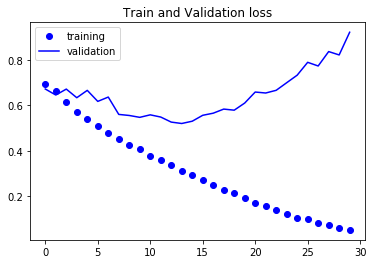

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], 'bo', label='training')
plt.plot(history.history['val_loss'], 'b', label='validation')
plt.title('Train and Validation loss')
plt.legend()
plt.show()

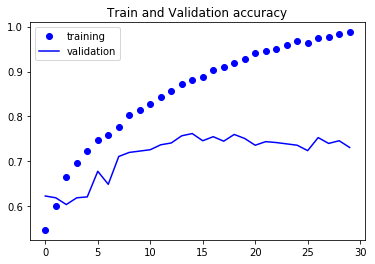

In [36]:
plt.plot(history.history['acc'], 'bo', label='training')
plt.plot(history.history['val_acc'], 'b', label='validation')
plt.title('Train and Validation accuracy')
plt.legend()
plt.show()

In [37]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
                             fill_mode='nearest')

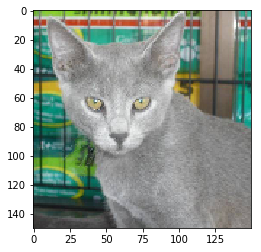

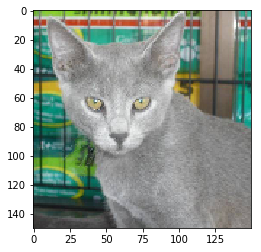

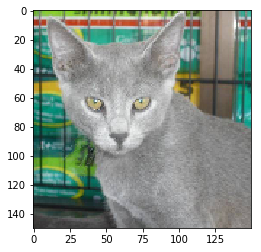

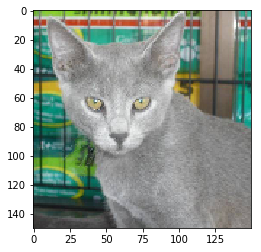

In [97]:
fnames = [os.path.join(validation_cats_dir, fname) for fname in os.listdir(validation_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4==0:
        break
plt.show()

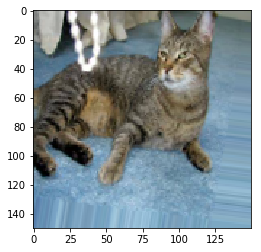

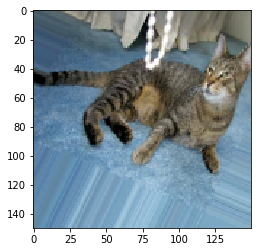

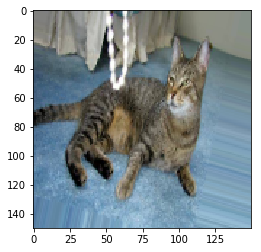

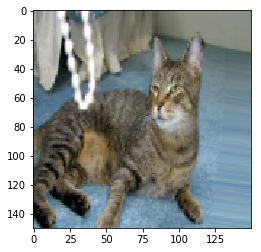

In [41]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4==0:
        break
plt.show()

In [48]:
train_data_gen = ImageDataGenerator(rescale=1/255., rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
                             fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1/255.)

train_generator = train_data_gen.flow_from_directory(train_dir, target_size=(150,150),
                                                     batch_size=32, class_mode='binary')

validation_generator = test_data_gen.flow_from_directory(validation_dir, target_size=(150,150),
                                                         batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [50]:
model.compile(optimizer=rmsprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, 
                              validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 84s 839ms/step - loss: 0.6933 - acc: 0.5169 - val_loss: 0.6794 - val_acc: 0.5970
Epoch 2/100
100/100 [==============================] - 82s 821ms/step - loss: 0.6821 - acc: 0.5547 - val_loss: 0.6705 - val_acc: 0.5490
Epoch 3/100
100/100 [==============================] - 85s 849ms/step - loss: 0.6693 - acc: 0.5850 - val_loss: 0.6471 - val_acc: 0.6170
Epoch 4/100
100/100 [==============================] - 84s 842ms/step - loss: 0.6499 - acc: 0.6097 - val_loss: 0.6330 - val_acc: 0.6320
Epoch 5/100
100/100 [==============================] - 85s 852ms/step - loss: 0.6270 - acc: 0.6341 - val_loss: 0.6099 - val_acc: 0.6620
Epoch 6/100
100/100 [==============================] - 85s 850ms/step - loss: 0.6246 - acc: 0.6453 - val_loss: 0.6156 - val_acc: 0.6580
Epoch 7/100
100/100 [==============================] - 85s 848ms/step - loss: 0.6142 - acc: 0.6637 - val_loss: 0.5828 - val_acc: 0.6820
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 85s 852ms/step - loss: 0.4208 - acc: 0.8019 - val_loss: 0.4738 - val_acc: 0.7880
Epoch 62/100
100/100 [==============================] - 85s 847ms/step - loss: 0.4122 - acc: 0.8075 - val_loss: 0.5054 - val_acc: 0.7420
Epoch 63/100
100/100 [==============================] - 85s 852ms/step - loss: 0.4237 - acc: 0.8053 - val_loss: 0.4591 - val_acc: 0.7900
Epoch 64/100
100/100 [==============================] - 85s 847ms/step - loss: 0.4147 - acc: 0.8059 - val_loss: 0.4688 - val_acc: 0.8060
Epoch 65/100
100/100 [==============================] - 85s 853ms/step - loss: 0.4102 - acc: 0.8128 - val_loss: 0.4521 - val_acc: 0.8040
Epoch 66/100
100/100 [==============================] - 85s 852ms/step - loss: 0.4117 - acc: 0.8131 - val_loss: 0.4555 - val_acc: 0.7860
Epoch 67/100
100/100 [==============================] - 84s 842ms/step - loss: 0.4099 - acc: 0.8144 - val_loss: 0.5460 - val_acc: 0.7850
Epoch 68/100
100/100 [===================

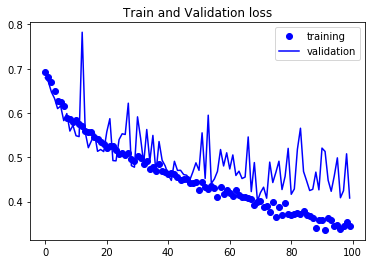

In [52]:
plt.plot(history.history['loss'], 'bo', label='training')
plt.plot(history.history['val_loss'], 'b', label='validation')
plt.title('Train and Validation loss')
plt.legend()
plt.show()

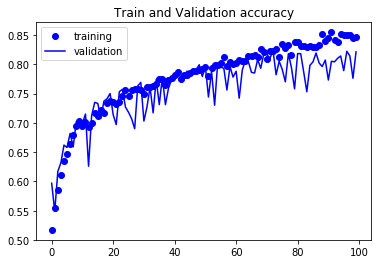

In [53]:
plt.plot(history.history['acc'], 'bo', label='training')
plt.plot(history.history['val_acc'], 'b', label='validation')
plt.title('Train and Validation accuracy')
plt.legend()
plt.show()

## Use pre-trained model

In [57]:
from keras.applications import VGG16

conv_base = VGG16(include_top=False, input_shape=(150,150,3), weights='imagenet')

58892288/58889256 [==============================] - 69s 1us/step


In [58]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [104]:
import numpy as np
datagen = ImageDataGenerator(rescale=1/255.)
batch_size = 20

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4 , 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150,150), 
                                            batch_size= batch_size, class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
        return features, labels
    
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [105]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [108]:
model = Sequential()
#model.add(layers.Flatten(input_shape=(4,4,512)))
#model.add(layers.Dense(1, activation='relu', input_dim=4*4*512))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=rmsprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [109]:
history = model.fit(train_features, train_labels, batch_size=20, epochs=30,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 375us/step - loss: 0.6934 - acc: 0.9955 - val_loss: 0.6953 - val_acc: 0.9890
Epoch 2/30
2000/2000 [==============================] - 0s 88us/step - loss: 0.6921 - acc: 0.9955 - val_loss: 0.6938 - val_acc: 0.9890
Epoch 3/30
2000/2000 [==============================] - 0s 88us/step - loss: 0.6909 - acc: 0.9955 - val_loss: 0.6926 - val_acc: 0.9890
Epoch 4/30
2000/2000 [==============================] - 0s 88us/step - loss: 0.6896 - acc: 0.9950 - val_loss: 0.6915 - val_acc: 0.9890
Epoch 5/30
2000/2000 [==============================] - 0s 88us/step - loss: 0.6886 - acc: 0.9955 - val_loss: 0.6903 - val_acc: 0.9890
Epoch 6/30
2000/2000 [==============================] - 0s 89us/step - loss: 0.6873 - acc: 0.9955 - val_loss: 0.6888 - val_acc: 0.9890
Epoch 7/30
2000/2000 [==============================] - 0s 91us/step - loss: 0.6861 - acc: 0.9960 - val_loss: 0.6876 - val_acc: 0.9890
Epoch 

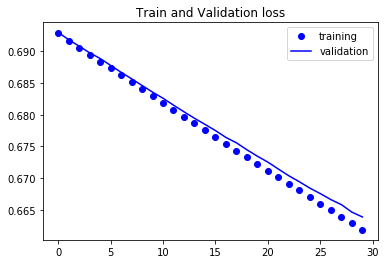

In [102]:
plt.plot(history.history['loss'], 'bo', label='training')
plt.plot(history.history['val_loss'], 'b', label='validation')
plt.title('Train and Validation loss')
plt.legend()
plt.show()

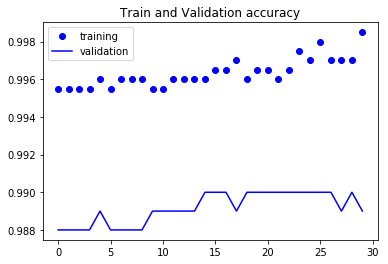

In [103]:
plt.plot(history.history['acc'], 'bo', label='training')
plt.plot(history.history['val_acc'], 'b', label='validation')
plt.title('Train and Validation accuracy')
plt.legend()
plt.show()